In [1]:
# for data cleaning and processing
import numpy as np
import pandas as pd

# for drawing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('FashionDataset.csv')
data.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [3]:
data.shape

(30758, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


## Data cleaning and process

In [5]:
data.columns

Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

### Let's see what all we can explore in this dataset
1. Which brand is most costly / affordable to the customer?

2. Which category has maximum options in women wear

3. How much Discount does each brand gives to it's customers?

4. How many option in sizes do women have?

In [6]:
data.rename(columns={'Deatils':'Details'})

,Unnamed: 0,BrandName,Details,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...,...
30753,21,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30754,22,Nan,Nan,Nan,Nan,Nan,Nan,Jewellery-Women
30755,23,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,24,estelle,womens gold plated double line fancy white and...,Nan,Nan,2799,Nan,Jewellery-Women


In [7]:
data.isna().any()

Unnamed: 0    False
BrandName     False
Deatils       False
Sizes         False
MRP           False
SellPrice     False
Discount      False
Category      False
dtype: bool

In [8]:
data.isna().head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


### There is no null values in dataset

### Before we move further, Let's drop or replace few features that we feel won't contribute much to our analysis - such as
Unnamed column

'Rs\n' from the MRP column

'Size:' from Sizes column

Converting all prices into integer type.

In [9]:
df=data.copy()

In [10]:
df.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [11]:
len(df.Sizes.unique())

1172

In [12]:
df.drop('Unnamed: 0', axis=1, inplace = True)
df

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...
30753,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30754,Nan,Nan,Nan,Nan,Nan,Nan,Jewellery-Women
30755,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,estelle,womens gold plated double line fancy white and...,Nan,Nan,2799,Nan,Jewellery-Women


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  30758 non-null  object
 1   Deatils    30758 non-null  object
 2   Sizes      30758 non-null  object
 3   MRP        30758 non-null  object
 4   SellPrice  30758 non-null  object
 5   Discount   30758 non-null  object
 6   Category   30758 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [14]:
# 把文字 Nan 取代成真正的NA
df.replace('Nan', np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  29575 non-null  object
 1   Deatils    29575 non-null  object
 2   Sizes      23257 non-null  object
 3   MRP        22550 non-null  object
 4   SellPrice  29575 non-null  object
 5   Discount   22550 non-null  object
 6   Category   30758 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [15]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18374 entries, 0 to 28418
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  18374 non-null  object
 1   Deatils    18374 non-null  object
 2   Sizes      18374 non-null  object
 3   MRP        18374 non-null  object
 4   SellPrice  18374 non-null  object
 5   Discount   18374 non-null  object
 6   Category   18374 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [16]:
df['Sizes']=df['Sizes'].str.replace('Size:',' ')
df

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...
26673,lemon & pepper,womens casual wear buckle closure flats - navy,"36,37,38,39,40",Rs\n2999,1499,50% off,Footwear-Women
26674,haute curry,womens casual wear slip on heels - black,"36,37,38,39,40",Rs\n2199,1099,50% off,Footwear-Women
26885,swiss eagle,womens analogue metallic watch,Error Size,Rs\n13990,4197,70% off,Watches-Women
27290,lawman watches,womens rose gold dial stainless steel analogue...,Error Size,Rs\n7499,4999,33% off,Watches-Women


In [17]:
df['Discount']=df['Discount'].str.replace('% off','')
df

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",Rs\n3499,2449,30,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",Rs\n1199,599,50,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",Rs\n2299,1379,40,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",Rs\n1699,849,50,Westernwear-Women
...,...,...,...,...,...,...,...
26673,lemon & pepper,womens casual wear buckle closure flats - navy,"36,37,38,39,40",Rs\n2999,1499,50,Footwear-Women
26674,haute curry,womens casual wear slip on heels - black,"36,37,38,39,40",Rs\n2199,1099,50,Footwear-Women
26885,swiss eagle,womens analogue metallic watch,Error Size,Rs\n13990,4197,70,Watches-Women
27290,lawman watches,womens rose gold dial stainless steel analogue...,Error Size,Rs\n7499,4999,33,Watches-Women


In [18]:
df['MRP']=df['MRP'].str.replace('Rs\n','')
df

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear-Women
...,...,...,...,...,...,...,...
26673,lemon & pepper,womens casual wear buckle closure flats - navy,"36,37,38,39,40",2999,1499,50,Footwear-Women
26674,haute curry,womens casual wear slip on heels - black,"36,37,38,39,40",2199,1099,50,Footwear-Women
26885,swiss eagle,womens analogue metallic watch,Error Size,13990,4197,70,Watches-Women
27290,lawman watches,womens rose gold dial stainless steel analogue...,Error Size,7499,4999,33,Watches-Women


In [19]:
df['SellPrice']=df['SellPrice'].astype(int)
df

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear-Women
...,...,...,...,...,...,...,...
26673,lemon & pepper,womens casual wear buckle closure flats - navy,"36,37,38,39,40",2999,1499,50,Footwear-Women
26674,haute curry,womens casual wear slip on heels - black,"36,37,38,39,40",2199,1099,50,Footwear-Women
26885,swiss eagle,womens analogue metallic watch,Error Size,13990,4197,70,Watches-Women
27290,lawman watches,womens rose gold dial stainless steel analogue...,Error Size,7499,4999,33,Watches-Women


In [20]:
df['Discount']=df['Discount'].astype(int)
df

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear-Women
...,...,...,...,...,...,...,...
26673,lemon & pepper,womens casual wear buckle closure flats - navy,"36,37,38,39,40",2999,1499,50,Footwear-Women
26674,haute curry,womens casual wear slip on heels - black,"36,37,38,39,40",2199,1099,50,Footwear-Women
26885,swiss eagle,womens analogue metallic watch,Error Size,13990,4197,70,Watches-Women
27290,lawman watches,womens rose gold dial stainless steel analogue...,Error Size,7499,4999,33,Watches-Women


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18374 entries, 0 to 28418
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  18374 non-null  object
 1   Deatils    18374 non-null  object
 2   Sizes      18374 non-null  object
 3   MRP        18374 non-null  object
 4   SellPrice  18374 non-null  int32 
 5   Discount   18374 non-null  int32 
 6   Category   18374 non-null  object
dtypes: int32(2), object(5)
memory usage: 1004.8+ KB


In [22]:
df.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear-Women


###  brand  most costly / affordable to the customer?

In [23]:
df.loc[df.duplicated()]

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
24,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1999,999,50,Westernwear-Women
148,life,printed cotton lycra round neck womens t-shirt...,"Large,Medium,Small,X-Large,X-Small",699,349,50,Westernwear-Women
280,life,printed cotton lycra round neck womens t-shirt...,"Large,Medium,Small,X-Large,X-Small",699,349,50,Westernwear-Women
356,life,skinny fit regular length cotton lycra womens ...,"26,28,30,32,34,36",999,499,50,Westernwear-Women
533,life,embroidered cotton blend round neck womens top...,"Large,Medium,Small,X-Large,X-Small",1299,649,50,Westernwear-Women
...,...,...,...,...,...,...,...
26391,shoetopia,synthetic womens casual sandals - gold,"37,38,39,40,41",999,699,30,Footwear-Women
26405,catwalk,polyurethane slipon womens casual loafers - brown,"5,6,7",2895,1447,50,Footwear-Women
26513,modare,pu slip on round toe womens casual flip flops ...,"36,37,38,39,40",3499,2449,30,Footwear-Women
26518,modare,pu zipper womens casual boots - black,"36,37,38,39,40",6999,4899,30,Footwear-Women


In [24]:
#把重複地拿掉
df.drop_duplicates(inplace=True)
df

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear-Women
...,...,...,...,...,...,...,...
26673,lemon & pepper,womens casual wear buckle closure flats - navy,"36,37,38,39,40",2999,1499,50,Footwear-Women
26674,haute curry,womens casual wear slip on heels - black,"36,37,38,39,40",2199,1099,50,Footwear-Women
26885,swiss eagle,womens analogue metallic watch,Error Size,13990,4197,70,Watches-Women
27290,lawman watches,womens rose gold dial stainless steel analogue...,Error Size,7499,4999,33,Watches-Women


In [25]:
df.shape

(17931, 7)

In [26]:
df.loc[df.duplicated()]

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category


#### All duplicates are removed

## visualization

In [27]:
df.head(2)

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17931 entries, 0 to 28418
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  17931 non-null  object
 1   Deatils    17931 non-null  object
 2   Sizes      17931 non-null  object
 3   MRP        17931 non-null  object
 4   SellPrice  17931 non-null  int32 
 5   Discount   17931 non-null  int32 
 6   Category   17931 non-null  object
dtypes: int32(2), object(5)
memory usage: 980.6+ KB


In [29]:
df['Category'].unique()

array(['Westernwear-Women', 'Indianwear-Women',
       'Lingerie&Nightwear-Women', 'Footwear-Women', 'Watches-Women'],
      dtype=object)

In [30]:
list(df.columns)

['BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice', 'Discount', 'Category']

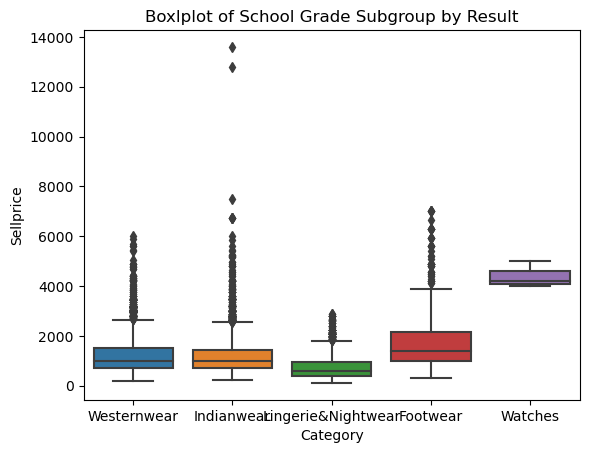

In [31]:
#我自己想看的
seaborn_boxplot = sns.boxplot(data = df, x='Category',y = 'SellPrice')

#x, y, 標題名字
seaborn_boxplot.set(
    xlabel = 'Category', 
    ylabel = 'Sellprice',
    title = 'Boxlplot of School Grade Subgroup by Result'
    )

labels_for_x_tick = ['Westernwear', 'Indianwear','Lingerie&Nightwear','Footwear','Watches']
seaborn_boxplot.set_xticklabels(labels_for_x_tick)
plt.show()

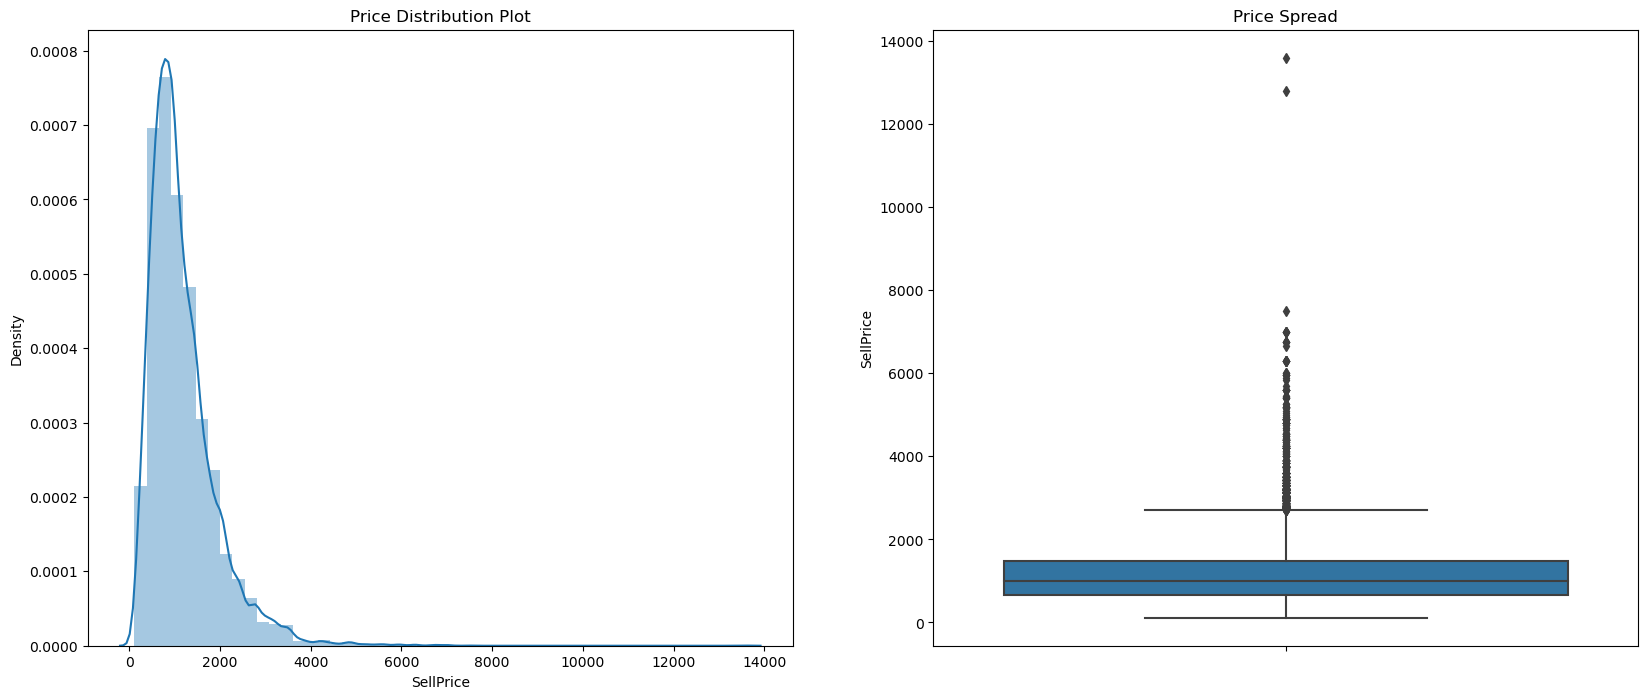

In [32]:
plt.figure(figsize=(20,8))
#seaborn_hist = sns.histplot(data = transfer_data, x = "school_grade", kde = True, hue = 'result_text')
plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.distplot(df['SellPrice'])

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df.SellPrice)

plt.show()

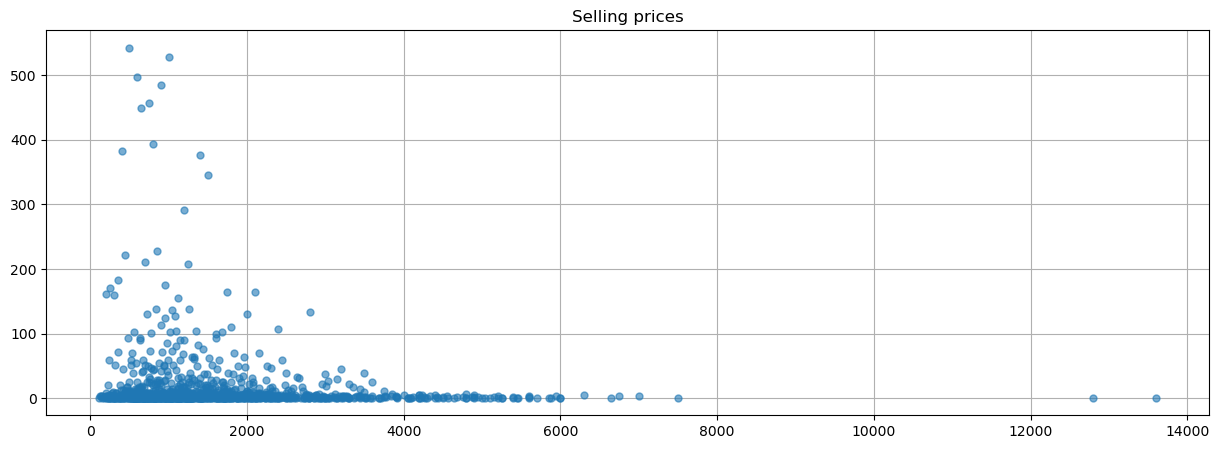

In [33]:
prices = df['SellPrice'].value_counts()
plt.figure(figsize=(15,5))

plt.grid()
plt.plot(prices, '.', alpha=0.6, markersize=10)
plt.title('Selling prices')
plt.show()

In [34]:
df.SellPrice.describe(percentiles=[0.25,0.50,0.75,0.85,0.95])

count    17931.000000
mean      1171.061792
std        746.728662
min        114.000000
25%        667.000000
50%        999.000000
75%       1484.000000
85%       1799.000000
95%       2569.500000
max      13599.000000
Name: SellPrice, dtype: float64

### Inferences:
1. the plot seems to slightly right-skewed meaning the most price in dataset are high
2. there is significant differnce between mean and median
3. 95% of the selling price is less than rs 2570
4. data points are slightly spread out from mean which indicates low variance in the price(85% of price are below
   1799) whereas the remaning 15% are  between 1799 and 13599

### Brand that is costly / affordable to the customer

## most costly

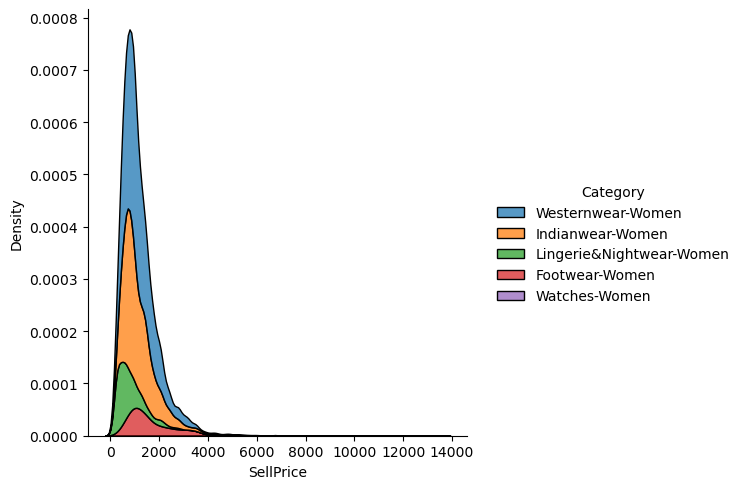

In [35]:
sns.displot(data=df, x="SellPrice", hue="Category",multiple="stack", kind="kde")
plt.show()

In [54]:
max_price = df['SellPrice'].max()
brand=df.loc[ max_price == df['SellPrice']]
brand

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
15744,global desi,solid cotton round neck womens ethnic set - ye...,"XL,Large,Medium,Small,X-Small,XX-Large",16999,13599,20,Indianwear-Women


In [63]:
max_price = df['SellPrice'].max()

brand=df.loc[ max_price == df['SellPrice'],'BrandName'].iloc[0]
categ=df.loc[max_price ==df['SellPrice'],'Category'].iloc[0]
print("======================================")
print(brand ,'is most costly among all the Brands with category ',categ ,'at Rs' ,max_price)

global desi is most costly among all the Brands with category  Indianwear-Women at Rs 13599


In [64]:
max_price=df.groupby(['BrandName','Category'])['SellPrice'].max().head(10)
max_price

BrandName    Category                
109f         Westernwear-Women           1399
aarke        Indianwear-Women            1140
adidas       Lingerie&Nightwear-Women    2519
             Westernwear-Women           3499
allen solly  Westernwear-Women           3599
altlife      Westernwear-Women            749
amante       Lingerie&Nightwear-Women    1356
amukti       Indianwear-Women            1499
and          Indianwear-Women            3199
             Westernwear-Women           4239
Name: SellPrice, dtype: int32

In [65]:
max_price=df.groupby(['BrandName','Category'])['SellPrice'].max().reset_index().head(10)
max_price

,BrandName,Category,SellPrice
0,109f,Westernwear-Women,1399
1,aarke,Indianwear-Women,1140
2,adidas,Lingerie&Nightwear-Women,2519
3,adidas,Westernwear-Women,3499
4,allen solly,Westernwear-Women,3599
5,altlife,Westernwear-Women,749
6,amante,Lingerie&Nightwear-Women,1356
7,amukti,Indianwear-Women,1499
8,and,Indianwear-Women,3199
9,and,Westernwear-Women,4239


In [66]:
max_price=df.groupby(['BrandName','Category'])['SellPrice'].max().reset_index().sort_values(by='SellPrice',ascending=False).head(10)
max_price

,BrandName,Category,SellPrice
44,global desi,Indianwear-Women,13599
146,w,Indianwear-Women,7499
102,new balance,Footwear-Women,6999
46,guess,Footwear-Women,6299
18,clarks,Footwear-Women,6299
37,forever new,Westernwear-Women,6000
12,biba,Indianwear-Women,5596
94,myshka,Indianwear-Women,5399
68,juniper,Indianwear-Women,5157
77,lawman watches,Watches-Women,4999


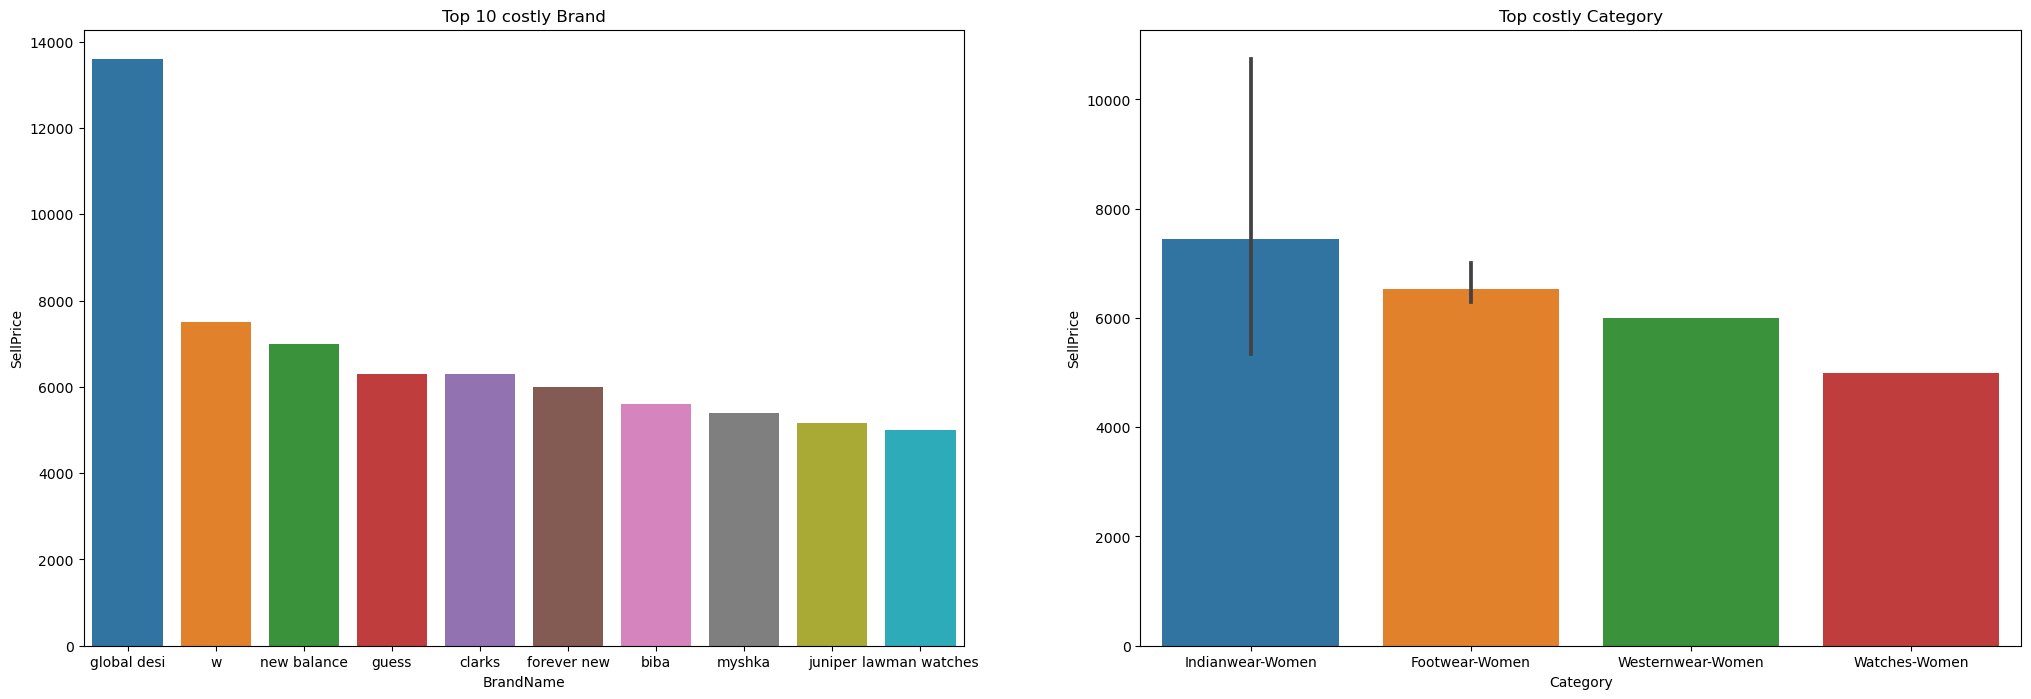

In [68]:
max_price=df.groupby(['BrandName','Category'])['SellPrice'].max().reset_index().sort_values(by='SellPrice',ascending=False).head(10)

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Top 10 costly Brand')
sns.barplot(x='BrandName' , y='SellPrice' ,data=max_price)

plt.subplot(1,2,2)
plt.title('Top costly Category')
sns.barplot(x='Category' , y='SellPrice' ,data=max_price)


plt.show()


### Inferences :
1. Most Costier Brand is global desi 
2. Most costier Category is Indianwear

In [69]:
min_price=df.groupby(['BrandName','Category'])['SellPrice'].min().reset_index().sort_values(by='SellPrice',ascending=True).head(10)
min_price

,BrandName,Category,SellPrice
19,clovia,Lingerie&Nightwear-Women,114
58,insense,Lingerie&Nightwear-Women,119
100,nayomi,Lingerie&Nightwear-Women,149
29,enamor,Lingerie&Nightwear-Women,150
123,soie,Lingerie&Nightwear-Women,192
148,wacoal,Lingerie&Nightwear-Women,197
57,infuse,Westernwear-Women,199
5,altlife,Westernwear-Women,199
56,infuse,Lingerie&Nightwear-Women,199
59,insense,Westernwear-Women,199


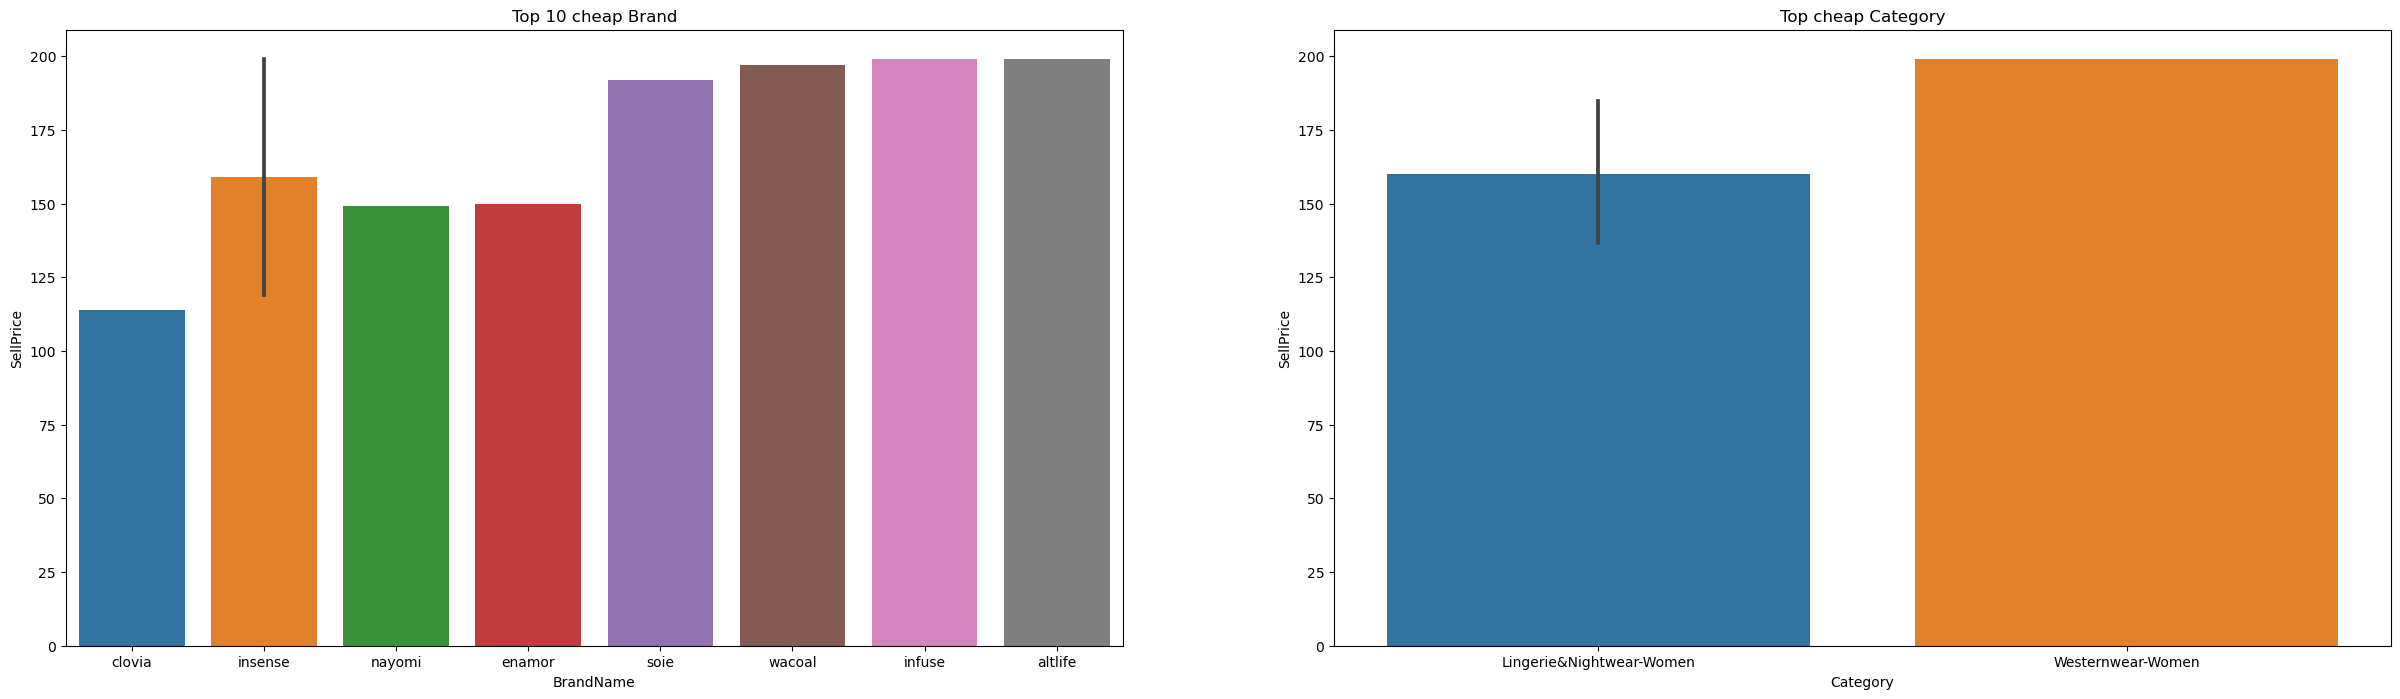

In [74]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.title('Top 10 cheap Brand')
sns.barplot(x='BrandName' , y='SellPrice' ,data=min_price)

plt.subplot(1,2,2)
plt.title('Top cheap Category')
sns.barplot(x='Category' , y='SellPrice' ,data=min_price)


plt.show()

### Inferences :
1. Most cheapest Brand is clovia
2. Most cheapest Category is Lingeries

In [77]:
df.head(5)

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear-Women


In [80]:
yearly_opening_rank = df.groupby(['SellPrice','BrandName']).BrandName.count().head(20)
yearly_opening_rank

SellPrice  BrandName
114        clovia        1
119        clovia        1
           insense       2
137        clovia        4
149        nayomi        1
150        enamor        3
174        enamor        1
189        enamor        2
192        soie          2
195        enamor        4
197        wacoal        1
199        altlife      17
           clovia        6
           enamor       22
           infuse       20
           insense      67
           life         29
205        clovia        6
           soie          2
209        enamor        4
Name: BrandName, dtype: int64

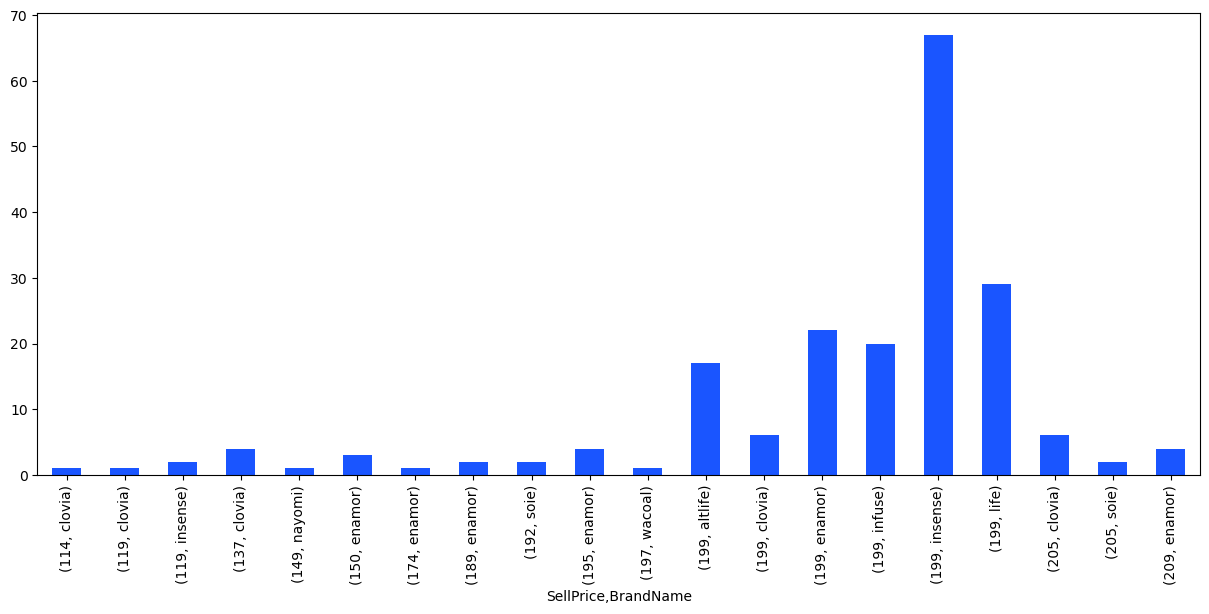

In [83]:
plt.figure(figsize=(15,6))
yearly_opening_rank = df.groupby(['SellPrice','BrandName']).BrandName.count().head(20).plot(kind = 'bar', color ='#1a55FF')
plt.show()


### Inferences : 
The above plots gives us an estimated range of clothes i.e between Rs 500 to 2500. While the plot in Yellow has slight lower range ofvalues certainly due to brands having Lingerie type of women wear.

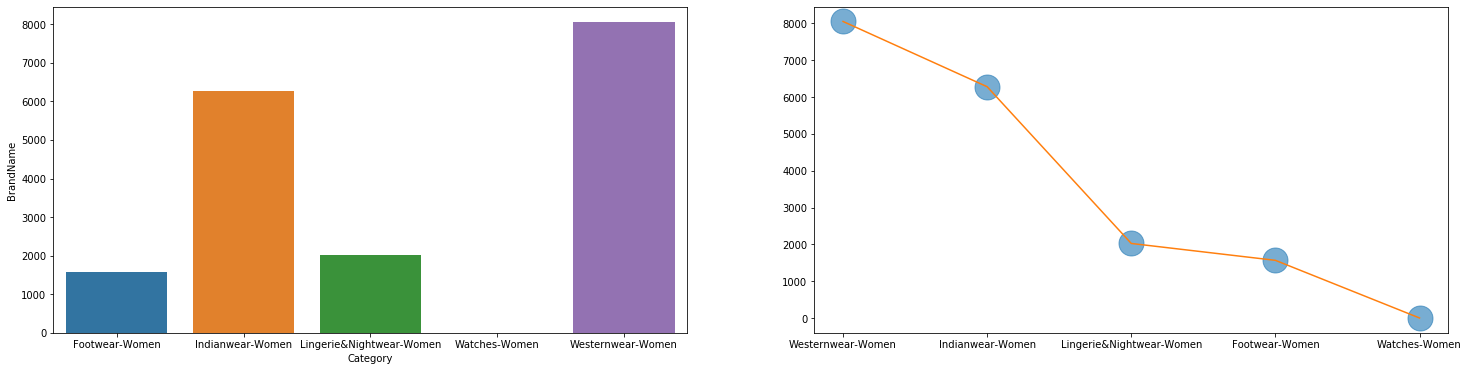

In [37]:
optional_clothing=df.groupby(['Category']).count().reset_index()

plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
sns.barplot(x='Category' , y='BrandName' ,data=optional_clothing)

optional_clothing=df['Category'].value_counts()

plt.subplot(1,2,2)
plt.plot(optional_clothing,'.', alpha=0.6, markersize=50)
plt.plot(optional_clothing)
plt.show()

### Inferences :
 Westernwear has maximum options for women wear 

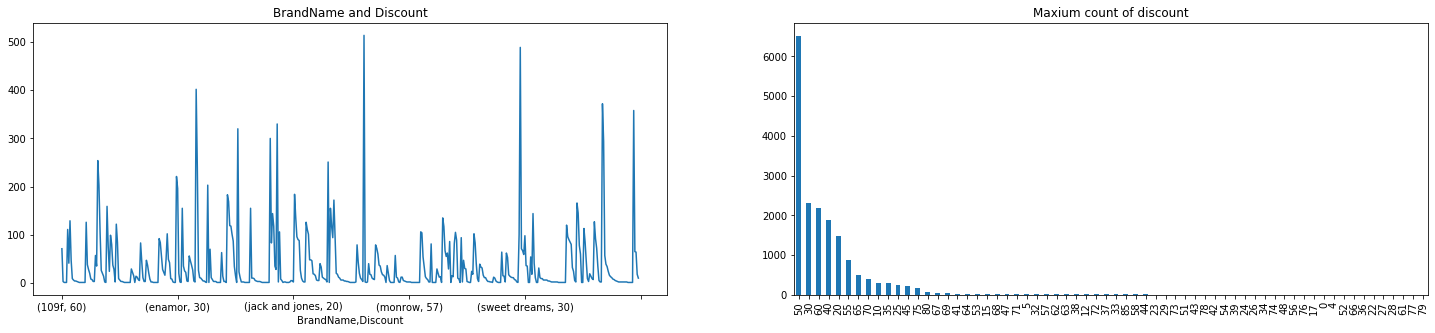

In [38]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.title('BrandName and Discount')
df.groupby(['BrandName'])['Discount'].value_counts().plot()

plt.subplot(1,2,2)
plt.title('Maxium count of discount')
df['Discount'].value_counts().head(100).plot(kind='bar')
plt.show()

### Inferences:
From the above plot, we can say that Most brands tuning it in about max of 50% to min of 10%.

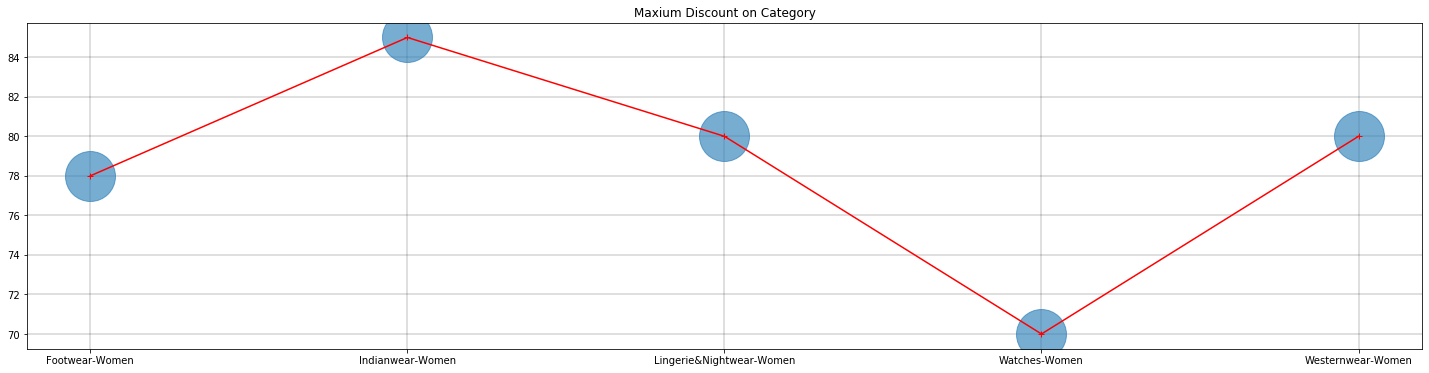

In [39]:
plt.figure(figsize=(25,6))
plt.title('Maxium Discount on Category')
Dis=df.groupby(['Category'])['Discount'].max()
plt.grid(color='black',linewidth = 0.25)
plt.plot(Dis,'.', alpha=0.6, markersize=50,marker='o')
plt.plot(Dis,color='red',marker='+')
plt.show()

### Inferences:
From the above plot, we can say that maximum Discount is given on IndianWear 

In [40]:
df.columns

Index(['BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice', 'Discount',
       'Category'],
      dtype='object')

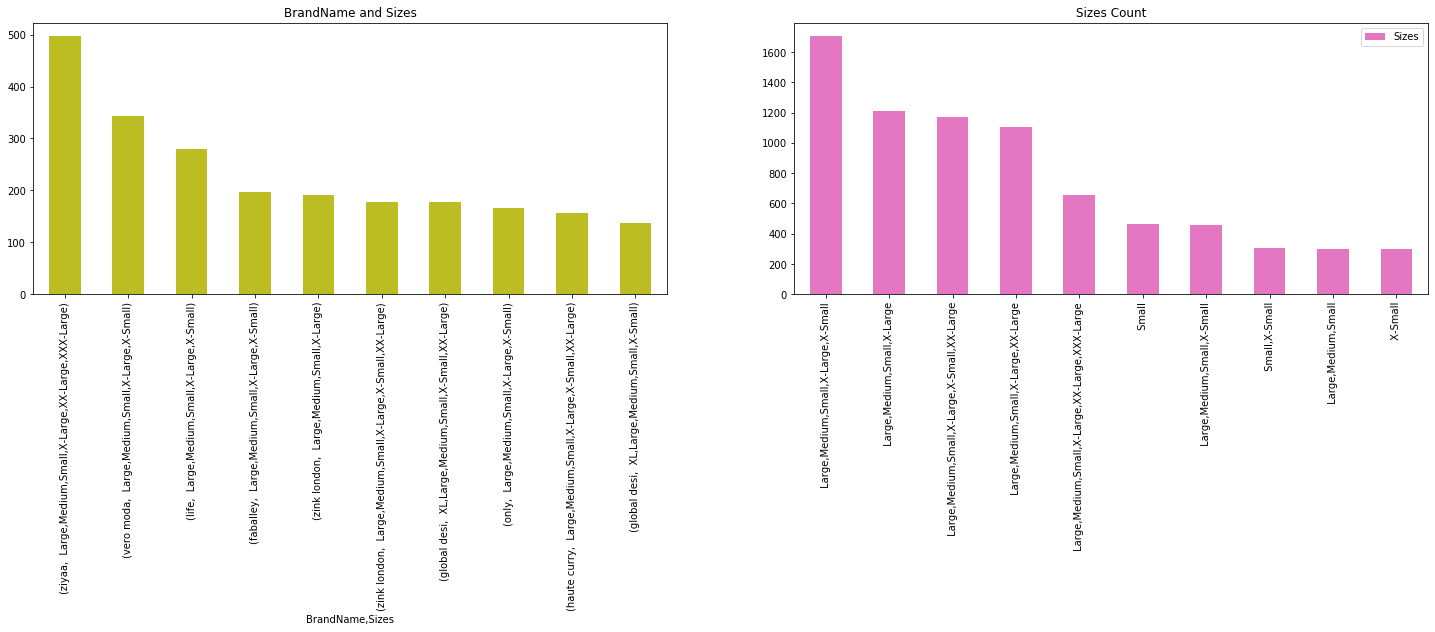

In [41]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.title('BrandName and Sizes')
df.groupby(['BrandName','Sizes']).Sizes.count().sort_values(ascending=False).head(10).plot(kind='bar',color='#bcbd22')

plt.subplot(1,2,2)
plt.title('Sizes Count')
df['Sizes'].value_counts().head(10).plot(kind='bar',color='#e377c2')
plt.legend()

#### As fashion industry is progressing, the brands are trying their best to fit into every customer size from small to XL sizes as well. Thus, from the above analysis it is clear that though the gap is shortneing but their is still high demand for sizes in Small,X-Small, Medium, Large and X-Large